# WeatherPy Challenge 6

---

## An Analysis of City Location and Weather Characteristics

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
NUM_POINTS = 1000

### Generate Cities List

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=NUM_POINTS)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=NUM_POINTS)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, add to cities list
    if city not in cities:
        cities.append(city)

# Print the cities counted to verify sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 468


---

## Weather Variables and Latitude

### OpenWeatherMap API retrieved data and related analysis

In [4]:
# Set the API base URL
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

# Define an empty list to retrieve weather data for each city
city_data = []

# Print to log information retrieval process
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in list to retrieve weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for tracking purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL specified to each city
    city_url = base_url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run API request for weather in each city
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
       # print("City not found. Skipping...")
        pass
    

              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port hawkesbury
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | basco
Processing Record 4 of Set 1 | sinegorye
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | saint george
Processing Record 7 of Set 1 | amderma
Processing Record 8 of Set 1 | priargunsk
Processing Record 9 of Set 1 | warrnambool
Processing Record 10 of Set 1 | faanui
Processing Record 11 of Set 1 | mandalgovi
Processing Record 12 of Set 1 | laguna
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | teguise
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | moose factory
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | champerico
Processing Record 20 of Set 1 | ergani
Processing Record 21 of Set 1 | codrington
Processing Record 22 of Set 1 | nalut
Processing Record 23 of Set 1 | rikite

Processing Record 49 of Set 4 | glubokoe
Processing Record 0 of Set 5 | beyneu
Processing Record 1 of Set 5 | aklavik
Processing Record 2 of Set 5 | tall kayf
Processing Record 3 of Set 5 | melfi
Processing Record 4 of Set 5 | yenagoa
Processing Record 5 of Set 5 | puro
Processing Record 6 of Set 5 | sarh
Processing Record 7 of Set 5 | sibolga
Processing Record 8 of Set 5 | sinnamary
Processing Record 9 of Set 5 | petrolia
Processing Record 10 of Set 5 | zhezkazgan
Processing Record 11 of Set 5 | luderitz
Processing Record 12 of Set 5 | liyang
Processing Record 13 of Set 5 | yarada
Processing Record 14 of Set 5 | cherskiy
Processing Record 15 of Set 5 | yar-sale
Processing Record 16 of Set 5 | chuy
Processing Record 17 of Set 5 | avarua
Processing Record 18 of Set 5 | teotitlan
Processing Record 19 of Set 5 | mangan
Processing Record 20 of Set 5 | manokwari
Processing Record 21 of Set 5 | khuzdar
Processing Record 22 of Set 5 | bakel
Processing Record 23 of Set 5 | salalah
Processing R

Processing Record 0 of Set 9 | palmer
Processing Record 1 of Set 9 | marshall
Processing Record 2 of Set 9 | barra dos coqueiros
Processing Record 3 of Set 9 | alpena
Processing Record 4 of Set 9 | seoul
Processing Record 5 of Set 9 | vao
Processing Record 6 of Set 9 | mitu
Processing Record 7 of Set 9 | sawakin
Processing Record 8 of Set 9 | mount isa
Processing Record 9 of Set 9 | srednekolymsk
Processing Record 10 of Set 9 | salyan
Processing Record 11 of Set 9 | kamaishi
Processing Record 12 of Set 9 | flinders
Processing Record 13 of Set 9 | pisco
Processing Record 14 of Set 9 | monte alegre de sergipe
Processing Record 15 of Set 9 | houma
Processing Record 16 of Set 9 | san quintin
Processing Record 17 of Set 9 | zhigansk
Processing Record 18 of Set 9 | bilma
Processing Record 19 of Set 9 | artyk
Processing Record 20 of Set 9 | peace river
Processing Record 21 of Set 9 | omsukchan
Processing Record 22 of Set 9 | amapa
Processing Record 23 of Set 9 | padang
Processing Record 24 of

In [5]:
# Convert the retrieved city weather data into a new DataFrame called city_data_df
city_data_df = pd.DataFrame(city_data)

In [6]:
# Display sample data from new DataFrame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port hawkesbury,45.6169,-61.3485,30.18,67,20,13.80,CA,1678052615
1,bluff,-46.6000,168.3333,53.80,69,37,6.55,NZ,1678052615
2,basco,20.4487,121.9702,71.11,64,100,21.63,PH,1678052616
3,sinegorye,62.0788,150.4770,-20.43,92,91,0.65,RU,1678052617
4,lebu,-37.6167,-73.6500,63.39,85,5,9.57,CL,1678052617


In [8]:
# Export the data into a csv
city_data_df.to_csv("/Users/antonettekg/Desktop/Challenges/python-api/output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("/Users/antonettekg/Desktop/Challenges/python-api/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port hawkesbury,45.6169,-61.3485,30.18,67,20,13.80,CA,1678052615
1,bluff,-46.6000,168.3333,53.80,69,37,6.55,NZ,1678052615
2,basco,20.4487,121.9702,71.11,64,100,21.63,PH,1678052616
3,sinegorye,62.0788,150.4770,-20.43,92,91,0.65,RU,1678052617
4,lebu,-37.6167,-73.6500,63.39,85,5,9.57,CL,1678052617


### Scatter Plots

#### Latitude Vs. Temperature

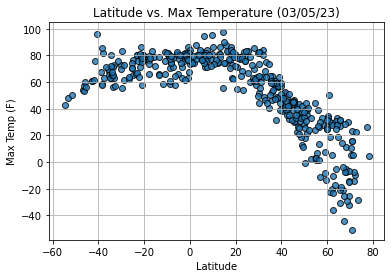

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
           city_data_df["Max Temp"],
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/antonettekg/Desktop/Challenges/python-api/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

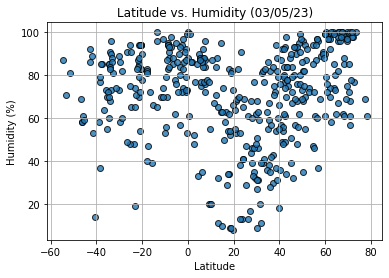

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("/Users/antonettekg/Desktop/Challenges/python-api/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

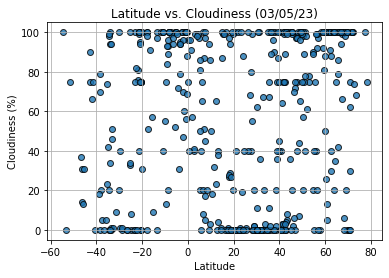

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("/Users/antonettekg/Desktop/Challenges/python-api/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

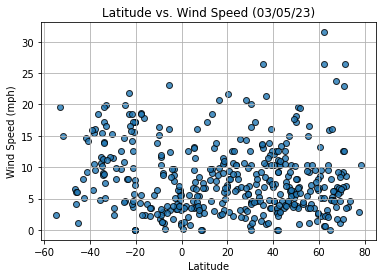

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
           city_data_df["Wind Speed"],
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("/Users/antonettekg/Desktop/Challenges/python-api/output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression Analysis


In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port hawkesbury,45.6169,-61.3485,30.18,67,20,13.80,CA,1678052615
2,basco,20.4487,121.9702,71.11,64,100,21.63,PH,1678052616
3,sinegorye,62.0788,150.4770,-20.43,92,91,0.65,RU,1678052617
5,saint george,37.1041,-113.5841,56.95,30,0,10.36,US,1678052461
6,priargunsk,50.3691,119.1012,-0.67,96,57,3.74,RU,1678052618


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bluff,-46.6000,168.3333,53.80,69,37,6.55,NZ,1678052615
4,lebu,-37.6167,-73.6500,63.39,85,5,9.57,CL,1678052617
7,warrnambool,-38.3833,142.4833,58.86,77,79,15.52,AU,1678052373
8,faanui,-16.4833,-151.7500,83.43,72,91,17.85,PF,1678052619
13,punta arenas,-53.1500,-70.9167,48.31,71,0,19.57,CL,1678052512


###  Temperature vs. Latitude

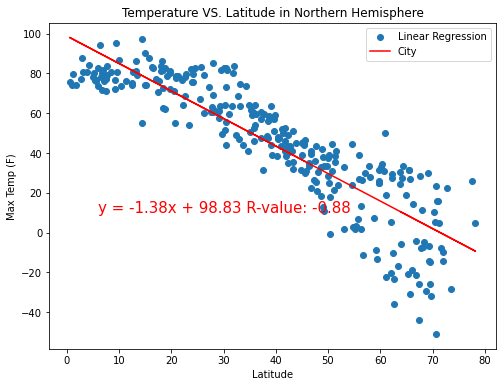

-0.8805217227204111


<Figure size 432x288 with 0 Axes>

In [31]:
## Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + " R-value: " + str(round(rvalue,2))
plt.figure(figsize=(8,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Temperature VS. Latitude in Northern Hemisphere")
plt.legend(['Linear Regression', 'City'])
plt.show()

# Save the figure
plt.savefig("/Users/antonettekg/Desktop/Challenges/python-api/output_data/Fig5.png")

print(rvalue)



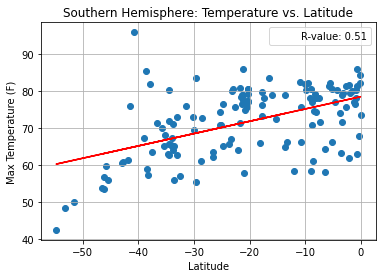

In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

# Filter southern hemisphere data
southern_hemisphere = [city for city in city_data if city["Lat"] <= 0]

# Create a DataFrame from the southern hemisphere data
southern_hemisphere_df = pd.DataFrame(southern_hemisphere)

# Fit a linear model to the data
slope, intercept, r_value, p_value, std_err = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"])

# Create a scatter plot of the data
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"])

# Add the regression line to the plot
plt.plot(southern_hemisphere_df["Lat"], intercept + slope*southern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere: Temperature vs. Latitude')
plt.grid()
plt.legend([f'R-value: {r_value:.2f}'], markerscale=0)

# Save the figure
plt.savefig("/Users/antonettekg/Desktop/Challenges/python-api/output_data/Fig6.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:** In this case, the r-value of .51 for the southern hemisphere suggests a moderate positive correlation between latitude and temperature, indicating that as one moves closer to the equator (i.e., lower latitudes), temperatures tend to increase. The r-value of -.88 for the northern hemisphere suggests a strong negative correlation, indicating that as one moves away from the equator (i.e., higher latitudes), temperatures tend to decrease. This analysis shows that while there is a positive correlation between temperature and relative latitude in both hemispheres, with warmer temperatures occuring nearer to the equator, the correlation is generally stronger in cities of the Northern Hemisphere.

### Humidity vs. Latitude

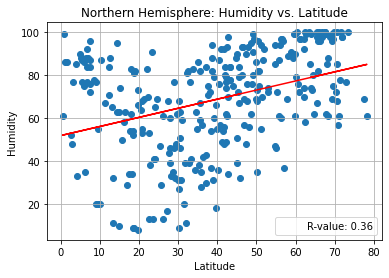

In [33]:
# Linear regression on Northern Hemisphere

# Filter northern hemisphere data
northern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Create a DataFrame from the northern hemisphere data
northern_hemisphere_df = pd.DataFrame(northern_hemisphere)

# Perform linear regression on the northern hemisphere data
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"])
linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"])

# Create a scatter plot of the data
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"])

# Add the regression line to the plot
plt.plot(northern_hemisphere_df["Lat"], intercept + slope*northern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere: Humidity vs. Latitude')
plt.grid()
plt.legend([f'R-value: {r_value:.2f}'], markerscale=0)

# Save the figure
plt.savefig("/Users/antonettekg/Desktop/Challenges/python-api/output_data/Fig7.png")

#Display
plt.show()


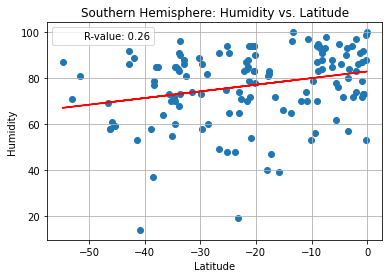

In [34]:
# Linear regression on Southern Hemisphere
southern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Perform linear regression on the Southern Hemisphere data
slope, intercept, r_value, p_value, std_err = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"])
linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"])

# Create a scatter plot of the data
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"])

# Add the regression line to the plot
plt.plot(southern_hemisphere_df["Lat"], intercept + slope*southern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere: Humidity vs. Latitude')
plt.grid()
plt.legend([f'R-value: {r_value:.2f}'], markerscale=0)

# Save the figure
plt.savefig("/Users/antonettekg/Desktop/Challenges/python-api/output_data/Fig8.png")

#Display
plt.show()

**Discussion about the linear relationship:** Based on the given correlation coefficients, there appears to be a weak positive correlation between latitude and humidity in both the northern and southern hemispheres.

An r-value of .26 for the southern hemisphere indicates a weak positive correlation, suggesting that as latitude increases, humidity tends to increase slightly as well, but the relationship is not very strong.

An r-value of .36 for the northern hemisphere also indicates a weak positive correlation, suggesting that as latitude increases, there is a slight tendency for humidity to increase, but again, the relationship is not very strong.

### Cloudiness vs. Latitude

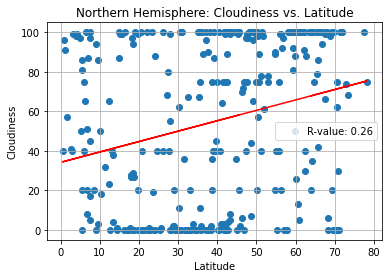

In [35]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
northern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Perform linear regression on the northern hemisphere data
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"])
linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"])

# Create a scatter plot of the data
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"])

# Add the regression line to the plot
plt.plot(northern_hemisphere_df["Lat"], intercept + slope*northern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere: Cloudiness vs. Latitude')
plt.grid()
plt.legend([f'R-value: {r_value:.2f}'], markerscale=0)

# Save the figure
plt.savefig("/Users/antonettekg/Desktop/Challenges/python-api/output_data/Fig9.png")

#Display
plt.show()

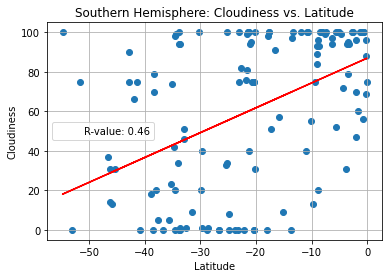

In [36]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
southern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Perform linear regression on the northern hemisphere data
slope, intercept, r_value, p_value, std_err = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"])
linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"])

# Create a scatter plot of the data
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"])

# Add the regression line to the plot
plt.plot(southern_hemisphere_df["Lat"], intercept + slope*southern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere: Cloudiness vs. Latitude')
plt.grid()
plt.legend([f'R-value: {r_value:.2f}'], markerscale=0)

# Save the figure
plt.savefig("/Users/antonettekg/Desktop/Challenges/python-api/output_data/Fig10.png")

#Display
plt.show()

**Discussion about the linear relationship:** A positive correlation between cloudiness and latitude would dictate that as latitude increases (i.e., moving away from the equator towards the poles), there is a tendency for cloudiness to also increase. Based on the above data, the r-value of .46 for the southern hemisphere and .26 for the northern hemisphere suggests a weak positive correlation between latitude and cloudiness in both hemispheres, albeit a slightly stronger correlation in the southern hemisphere.



### Wind Speed vs. Latitude

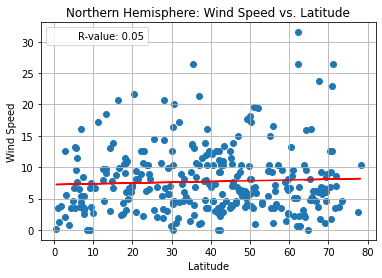

In [37]:
## Linear regression on Northern Hemisphere
northern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Perform linear regression on the northern hemisphere data
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"])
linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"])

# Create a scatter plot of the data
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"])

# Add the regression line to the plot
plt.plot(northern_hemisphere_df["Lat"], intercept + slope*northern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere: Wind Speed vs. Latitude')
plt.grid()
plt.legend([f'R-value: {r_value:.2f}'], markerscale=0)

# Save the figure
plt.savefig("/Users/antonettekg/Desktop/Challenges/python-api/output_data/Fig11.png")

#Display
plt.show()

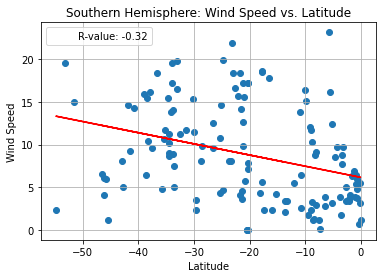

In [38]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
southern_hemisphere = [city for city in city_data if city["Lat"] >= 0]

# Import the linregress function from the scipy.stats module
from scipy.stats import linregress

# Perform linear regression on the northern hemisphere data
slope, intercept, r_value, p_value, std_err = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"])
linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"])

# Create a scatter plot of the data
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"])

# Add the regression line to the plot
plt.plot(southern_hemisphere_df["Lat"], intercept + slope*southern_hemisphere_df["Lat"], '-r')

# Add labels and title to the plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere: Wind Speed vs. Latitude')
plt.grid()
plt.legend([f'R-value: {r_value:.2f}'], markerscale=0)

# Save the figure
plt.savefig("/Users/antonettekg/Desktop/Challenges/python-api/output_data/Fig12.png")

#Display
plt.show()

**Discussion about the linear relationship:** In this case, a positive correlation means that as latitude increases (i.e., moving away from the equator towards the poles), there is a tendency for windspeed to also increase. As the data shows, however, the correlation coefficients here indicate a very weak relationship, suggesting other factors probably have a stronger influence on windspeed patterns than solely latitude.